<a href="https://colab.research.google.com/github/Noman-494/my_new/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Customer Purchasing Behaviors.csv')

In [3]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


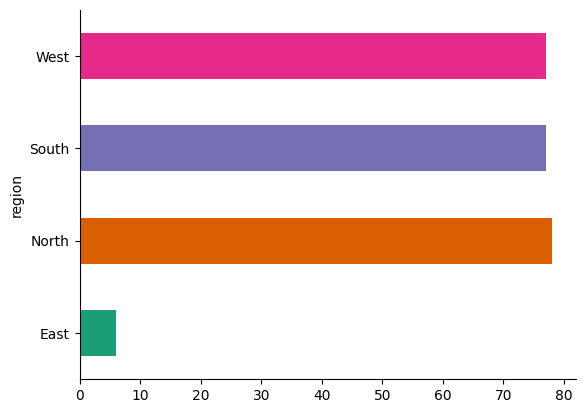

In [4]:
# @title region

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


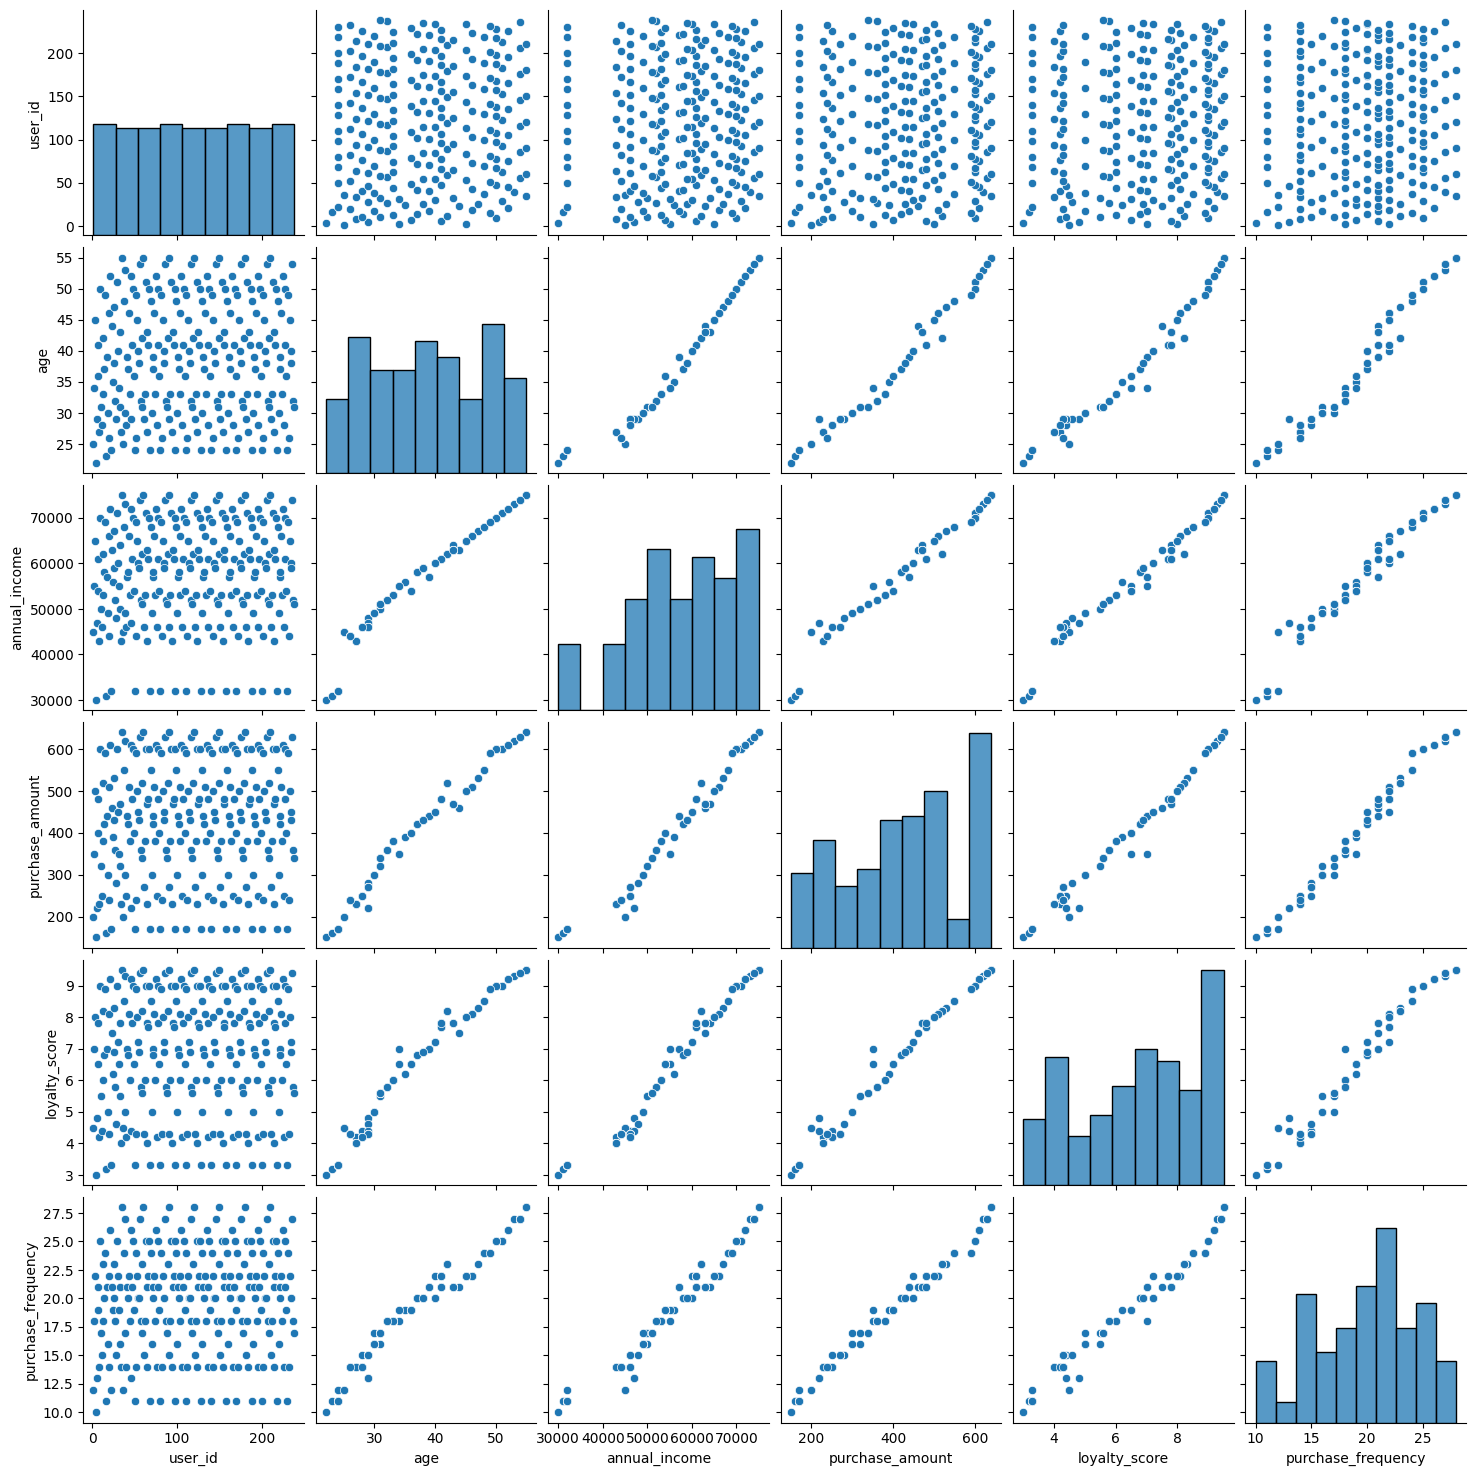

In [6]:
sns.pairplot(df)


In [10]:
df.drop('user_id',axis=1,inplace=True)

In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first', sparse_output=False)
df['region']=ohe.fit_transform(df['region'].values.reshape(-1,1))

In [18]:
df.head()

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,25,45000,200,4.5,1.0,12
1,34,55000,350,7.0,0.0,18
2,45,65000,500,8.0,0.0,22
3,22,30000,150,3.0,0.0,10
4,29,47000,220,4.8,1.0,13


In [19]:
numerical_cols=df.select_dtypes(include=np.number).columns

Index(['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'region',
       'purchase_frequency'],
      dtype='object')

In [29]:
numerical_cols=numerical_cols.drop("region")

In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df["numerical_cols"]=ss.fit_transform(df["numerical_cols"])

KeyError: 'numerical_cols'

In [31]:
df[numerical_cols] = ss.fit_transform(df[numerical_cols])

In [33]:
df[numerical_cols]

,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
0,-1.465632,-1.090306,-1.614441,-1.210582,-1.712679
1,-0.501151,-0.211563,-0.541153,0.108642,-0.394950
2,0.677658,0.667180,0.532134,0.636332,0.483536
3,-1.787125,-2.408420,-1.972203,-2.002117,-2.151922
4,-1.036974,-0.914557,-1.471336,-1.052275,-1.493057
...,...,...,...,...,...
233,0.141835,0.227809,0.174372,0.214180,0.044293
234,-0.072494,0.139934,0.031267,0.055873,0.044293
235,1.642138,1.458049,1.462317,1.375097,1.581644
236,-0.715480,-0.475186,-0.469601,-0.524586,-0.394950


In [34]:
df

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,-1.465632,-1.090306,-1.614441,-1.210582,1.0,-1.712679
1,-0.501151,-0.211563,-0.541153,0.108642,0.0,-0.394950
2,0.677658,0.667180,0.532134,0.636332,0.0,0.483536
3,-1.787125,-2.408420,-1.972203,-2.002117,0.0,-2.151922
4,-1.036974,-0.914557,-1.471336,-1.052275,1.0,-1.493057
...,...,...,...,...,...,...
233,0.141835,0.227809,0.174372,0.214180,0.0,0.044293
234,-0.072494,0.139934,0.031267,0.055873,1.0,0.044293
235,1.642138,1.458049,1.462317,1.375097,0.0,1.581644
236,-0.715480,-0.475186,-0.469601,-0.524586,0.0,-0.394950


In [36]:
from sklearn.cluster import KMeans

In [46]:
wccs=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  # Select only numerical columns and then convert to NumPy array
  kmeans.fit(df.select_dtypes(include=['number']).to_numpy())
  wccs.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [48]:
wccs

[870.6134453781505,
 340.2323338824614,
 221.3731481214791,
 175.5833182680443,
 146.6380646868282,
 119.30764661068774,
 92.79048663172037,
 72.31805273184736,
 54.999823201726684,
 42.69553757779256]

[870.6134453781505,
 340.2323338824614,
 221.3731481214791,
 175.5833182680443,
 146.6380646868282,
 119.30764661068774,
 92.79048663172037,
 72.31805273184736,
 54.999823201726684,
 42.69553757779256]

Text(0, 0.5, 'WCSS')

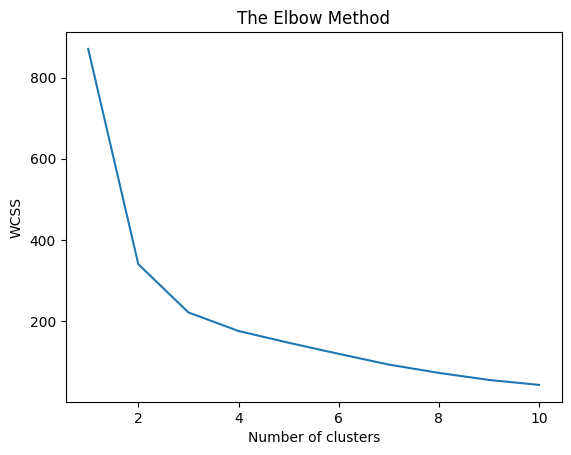

In [49]:
plt.plot(range(1,11),wccs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [52]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
# Fit the KMeans model to only the numerical columns of the DataFrame
kmeans.fit(df.select_dtypes(include=['number']).to_numpy())
y_mean=kmeans.predict(df.select_dtypes(include=['number']).to_numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [53]:
y_mean

array([1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 1,
       2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       0, 1, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1,
       2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1,
       0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2,
       2, 2, 0, 1, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1,
       2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       2, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0,
       2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1,
       2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1], dtype=int32)

In [54]:
df[y_mean==0]

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
2,0.677658,0.667180,0.532134,0.636332,0.0,0.483536
8,1.213480,1.106551,1.247659,1.164021,1.0,1.142401
14,1.106315,1.018677,1.176107,1.111252,0.0,0.922779
20,1.427809,1.282300,1.319212,1.269559,0.0,1.362022
25,0.891986,0.842929,0.746792,0.794639,0.0,0.703158
...,...,...,...,...,...,...
218,0.999151,0.930803,0.889897,0.900177,0.0,0.922779
224,1.427809,1.282300,1.319212,1.269559,0.0,1.362022
227,1.213480,1.106551,1.247659,1.164021,0.0,1.142401
230,1.106315,1.018677,1.176107,1.111252,0.0,0.922779


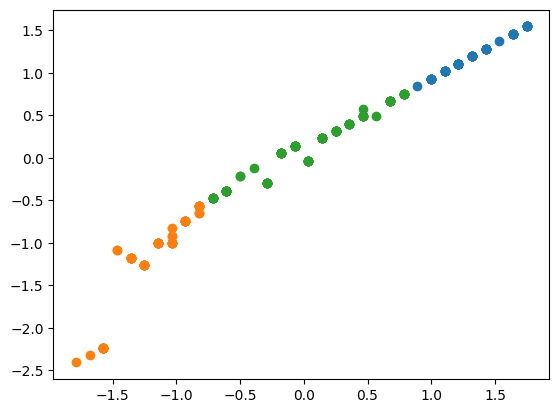

In [57]:
plt.scatter(df[y_mean==0]['age'],df[y_mean==0]['annual_income']) # Access columns by name after filtering with boolean array
plt.scatter(df[y_mean==1]['age'],df[y_mean==1]['annual_income'])
plt.scatter(df[y_mean==2]['age'],df[y_mean==2]['annual_income'])